In [78]:
import pandas as pd #imports python libraries
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
import seaborn as sns

ds = load_dataset("lukebarousse/data_jobs") #imports data
df = ds['train'].to_pandas() #imports data inot python

/var/folders/bw/hyhwy085297517x3641dn4d80000gn/T/ipykernel_52873/3646507594.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_plot = top_five_skills/df_ds_count[0] * 100 # crates new series of computation results


Text(0.5, 0, 'percent of job postings mentioned')

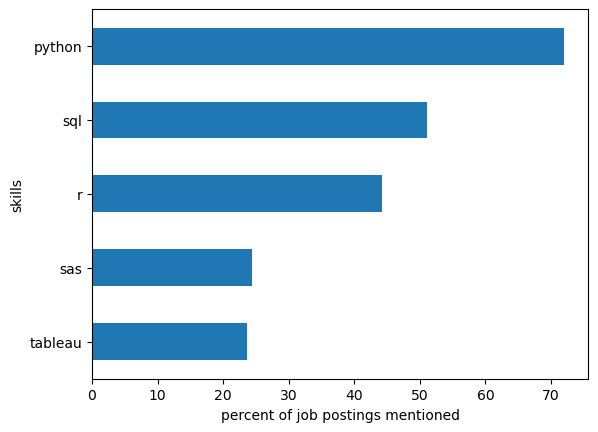

In [79]:
df["job_skills"]= df["job_skills"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # cleans job skills

df_ds = df[(df['job_country'] == "United States") & (df["job_title_short"] == "Data Scientist")] # filters for specific job and country

df_ds_exploded = df_ds.explode("job_skills") # creates a row ofr each skill in a job posting

top_five_skills = df_ds_exploded.value_counts("job_skills").sort_values(ascending=False).head(5) # identifies top five skills by mention

df_ds_count = df_ds["job_title_short"].value_counts() # counts job postings by title

df_plot = top_five_skills/df_ds_count[0] * 100 # crates new series of computation results

figure, ax = plt.subplots() #graph
ax = df_plot.sort_values(ascending=True).plot(kind="barh", x="top_five_skills", y="df_plot")
plt.ylabel("skills")
plt.xlabel("percent of job postings mentioned")

/var/folders/bw/hyhwy085297517x3641dn4d80000gn/T/ipykernel_52873/528514626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds["job_posted_date"] = pd.to_datetime(df_ds["job_posted_date"])
/var/folders/bw/hyhwy085297517x3641dn4d80000gn/T/ipykernel_52873/528514626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds["month"] = df_ds["job_posted_date"].dt.month


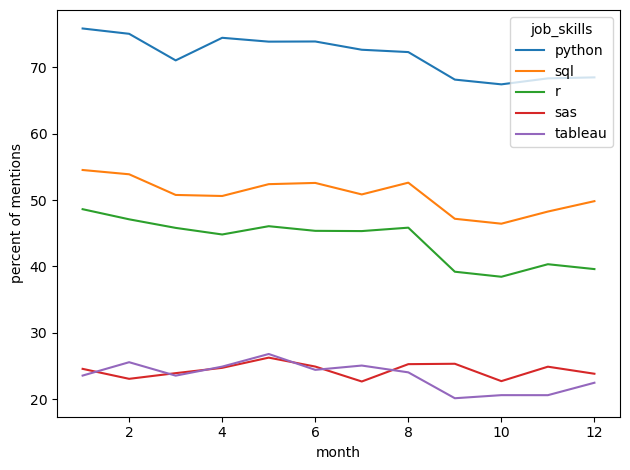

In [80]:
df_ds_exploded["job_posted_date"] = pd.to_datetime(df_ds_exploded["job_posted_date"]) #cleans date column

df_ds_exploded["month"] = df_ds_exploded["job_posted_date"].dt.month # creates month column

df_ds["job_posted_date"] = pd.to_datetime(df_ds["job_posted_date"])

df_ds["month"] = df_ds["job_posted_date"].dt.month

top_five_skills = df_ds_exploded["job_skills"].value_counts().head(5).index.tolist() # identifies top five Data Science skills by mentions

df_pivot = df_ds_exploded.pivot_table(index="month", columns="job_skills", aggfunc="size") # creates dataframe with skills count by month

ds_job_count = df_ds_exploded.pivot_table(index="month", columns="job_title_short", aggfunc="size") 

job_count_series = df_ds.groupby("month").size()

df_topfive = df_pivot[top_five_skills] # convertes dataframe to series for computation

df_plot = df_topfive.div(job_count_series, axis=0) * 100 # computes arithmetic

df_plot.plot(kind="line") #graph
plt.ylabel("percent of mentions")
plt.xlabel("month")
plt.tight_layout()


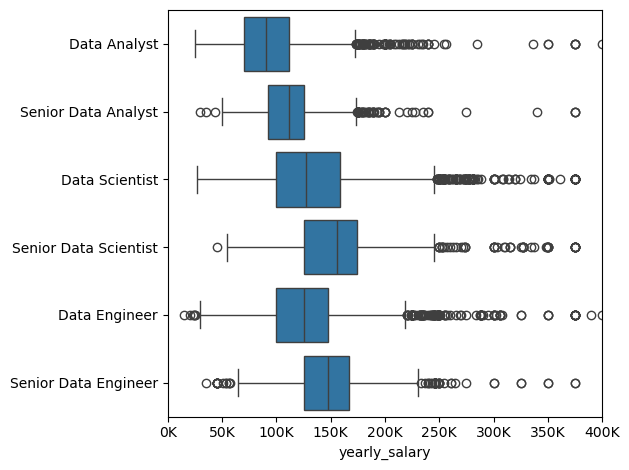

In [81]:
import matplotlib.ticker as mticker #formating module

jobs_of_interest = ["Data Analyst", "Senior Data Analyst",
                    "Data Scientist", "Senior Data Scientist", "Data Engineer", "Senior Data Engineer"] #list of relavant job titles

df_roles = df[df["job_title_short"].isin(jobs_of_interest)] #filter dataframe to relavant jobs only

fig, ax = plt.subplots() #creates graph

sns.boxplot( #boxplot graph
    data=df_roles,
    y="job_title_short",
    x="salary_year_avg",
    order=jobs_of_interest)


plt.ylabel("") #formating conventions
plt.xlabel("yearly_salary")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))
ax.set_xlim(0, 400_000)
plt.tight_layout()

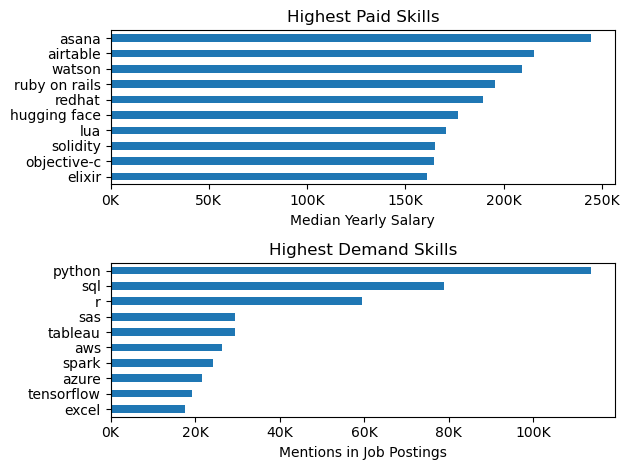

In [82]:
df_ds = df[df['job_title_short'] == 'Data Scientist']

df_ds_exploded = df_ds.explode('job_skills')

highest_pay = df_ds_exploded.groupby("job_skills")['salary_year_avg'].median().sort_values(ascending=False).head(10)

highest_demand = df_ds_exploded["job_skills"].value_counts(ascending=False).head(10)

figure, ax = plt.subplots(2, 1)

highest_pay.sort_values(ascending=True).plot(kind="barh", ax=ax[0], title="Highest Paid Skills")

highest_demand.sort_values(ascending=True).plot(kind="barh", ax=ax[1], title="Highest Demand Skills")

ax[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))
ax[0].set_xlabel("Median Yearly Salary")
ax[0].set_ylabel("")
ax[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))
ax[1].set_xlabel("Mentions in Job Postings")
ax[1].set_ylabel("")

plt.tight_layout()

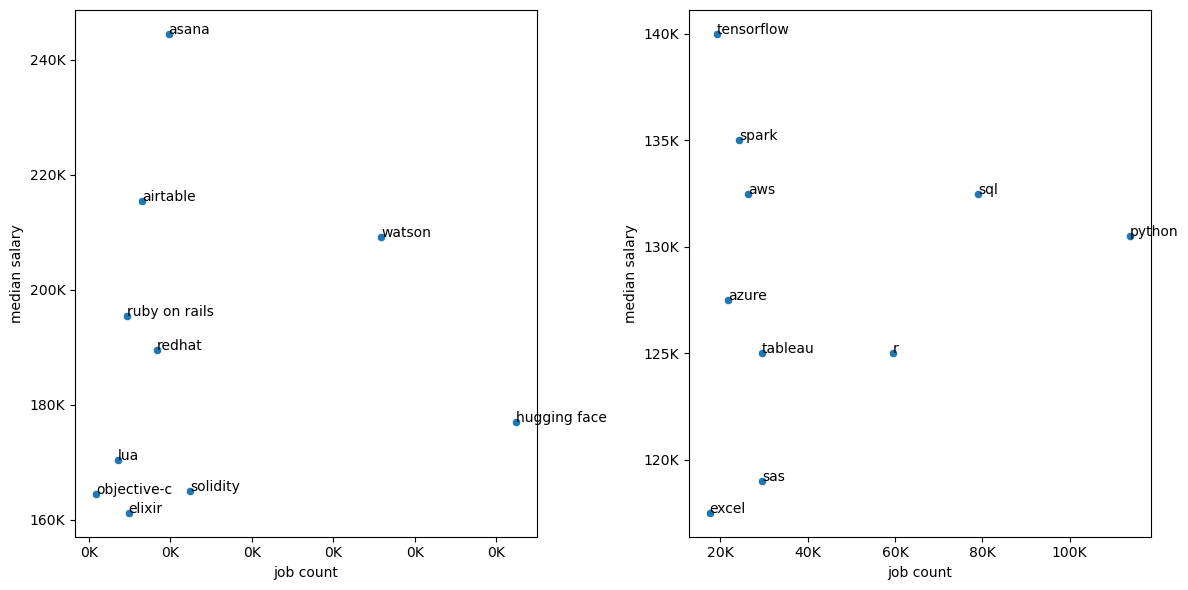

In [141]:
import matplotlib.ticker as mticker

df_ds = df[df['job_title_short'] == 'Data Scientist'] #filters for job

df_ds_exploded = df_ds.explode('job_skills') # explodes skills

highest_pay = df_ds_exploded.groupby("job_skills")['salary_year_avg'].median().sort_values(ascending=False).head(10) # identifies top 10 paying skills

df_highest_pay = df_ds_exploded[df_ds_exploded["job_skills"].isin(highest_pay.index)] #creates dataframe of job postings for just top 10 paying skills

highest_pay_demand = df_highest_pay["job_skills"].value_counts(ascending=False).head(10) #counts job postings per skill in top 10 paying skills


df_1a = pd.DataFrame(highest_pay_demand).reset_index()
df_1a.columns = ["job_skills", "count"]

df_1b = pd.DataFrame(highest_pay).reset_index()
df_1b.columns = ["job_skills", "salary_year_avg"]

df_1 = df_1a.merge(df_1b, on="job_skills")


df_ds = df[df['job_title_short'] == 'Data Scientist'] #filters for job

df_ds_exploded = df_ds.explode('job_skills') # explodes skills

highest_demand = df_ds_exploded["job_skills"].value_counts(ascending=False).head(10) #identifies top 10 highest job counts per skill

df_highest_demand = df_ds_exploded[df_ds_exploded["job_skills"].isin(highest_demand.index)] #creates new dataframe for top 10 most in demand skills

highest_demand_pay = df_highest_demand.groupby("job_skills")['salary_year_avg'].median().sort_values(ascending=False).head(10) #calculates median salary for these top 10 skills


df_2a = pd.DataFrame(highest_demand_pay).reset_index()
df_2a.columns = ["job_skills", "salary_year_avg"]

df_2b = pd.DataFrame(highest_demand).reset_index()
df_2b.columns = ["job_skills", "count"]

df_2 = df_2a.merge(df_2b, on="job_skills")


fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.scatterplot(data=df_1, x="count", y="salary_year_avg", ax=ax[0])

for i in range(len(df_1)):
    ax[0].text(
        df_1["count"].iloc[i],               # x-coordinate
        df_1["salary_year_avg"].iloc[i],     # y-coordinate
        df_1["job_skills"].iloc[i]            
    )
ax[0].set_ylabel("median salary")
ax[0].set_xlabel("job count")
ax[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))
ax[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))

sns.scatterplot(data=df_2, x="count", y="salary_year_avg", ax=ax[1])

for i in range(len(df_2)):
    ax[1].text(
        df_2["count"].iloc[i],               # x-coordinate
        df_2["salary_year_avg"].iloc[i],     # y-coordinate
        df_2["job_skills"].iloc[i]
    )
ax[1].set_ylabel("median salary")
ax[1].set_xlabel("job count")
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))
ax[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1000)}K"))

plt.tight_layout()

In [ ]:
#attempting the Pareto formula